# LOAN APPLICATION STATUS PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:/Users/user/Desktop/DT Python/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.iterrows

<bound method DataFrame.iterrows of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849      

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
df['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [11]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [12]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [13]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

 CORRELATION HEATMAP

In [14]:
corr=df.corr()
corr.shape

(5, 5)

In [15]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


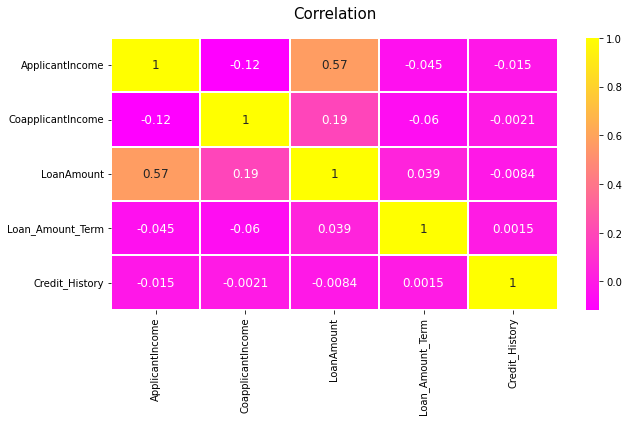

In [16]:
def correlation_heatmap(df):
    ax=plt.subplots(figsize=(10,5))
    colormap=sns.diverging_palette(220, 10, as_cmap = True)
    ax=sns.heatmap(df.corr(),cmap="spring",annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title('Correlation',y=1.05,size=15)

correlation_heatmap(df)

In [17]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

EDA

<AxesSubplot:xlabel='Education', ylabel='count'>

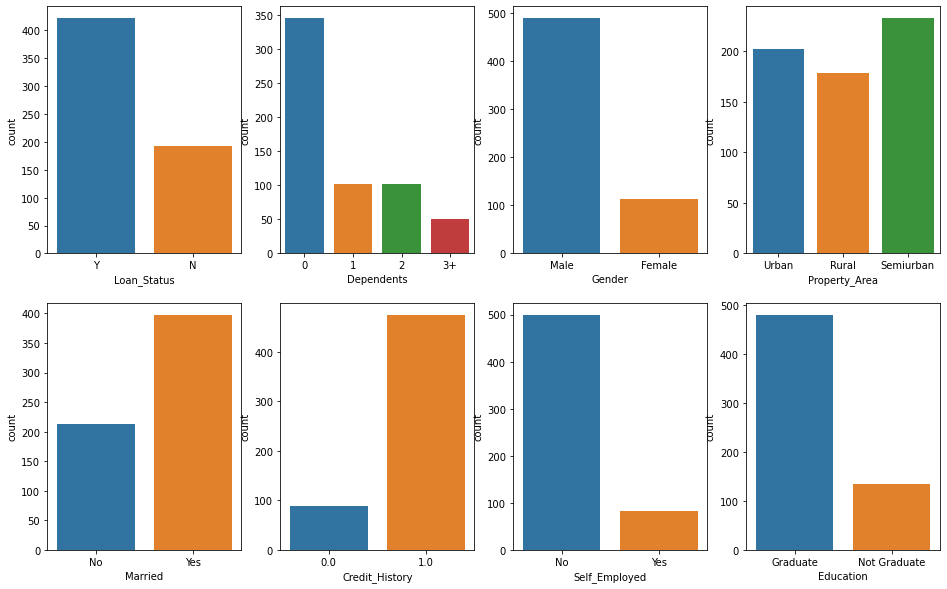

In [18]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=df,ax=ax[0][0])
sns.countplot('Dependents',data=df,ax=ax[0][1])
sns.countplot('Gender',data=df,ax=ax[0][2])
sns.countplot('Property_Area',data=df,ax=ax[0][3])
sns.countplot('Married',data=df,ax=ax[1][0])
sns.countplot('Credit_History',data=df,ax=ax[1][1])
sns.countplot('Self_Employed',data=df,ax=ax[1][2])
sns.countplot('Education',data=df,ax=ax[1][3])

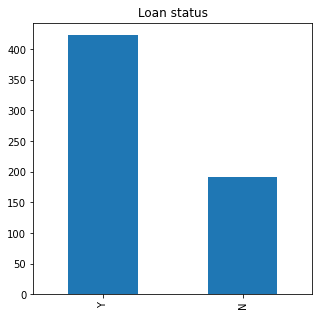

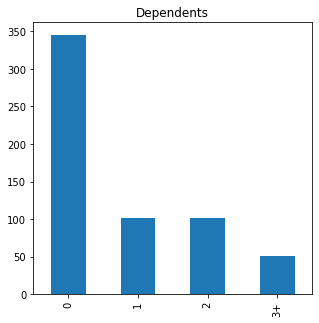

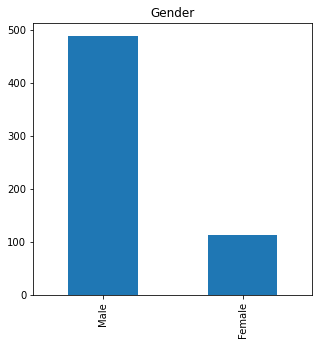

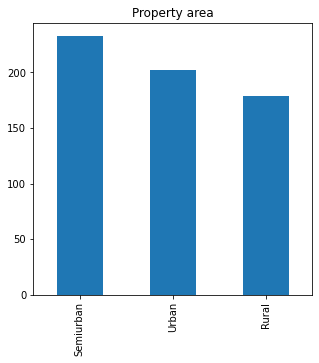

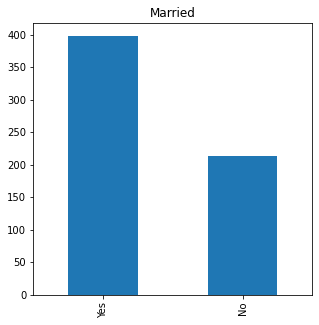

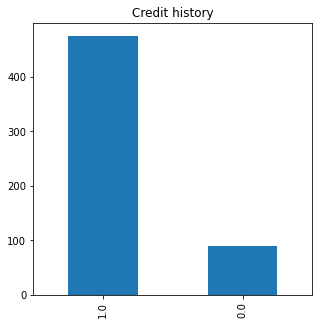

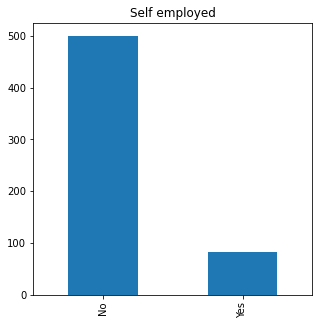

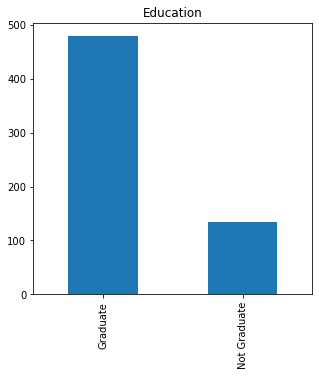

In [19]:
df['Loan_Status'].value_counts().plot(kind='bar',title='Loan status',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Dependents'].value_counts().plot(kind='bar',title='Dependents',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Gender'].value_counts().plot(kind='bar',title='Gender',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Property_Area'].value_counts().plot(kind='bar',title='Property area',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Married'].value_counts().plot(kind='bar',title='Married',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Credit_History'].value_counts().plot(kind='bar',title='Credit history',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Self_Employed'].value_counts().plot(kind='bar',title='Self employed',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Education'].value_counts().plot(kind='bar',title='Education',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()


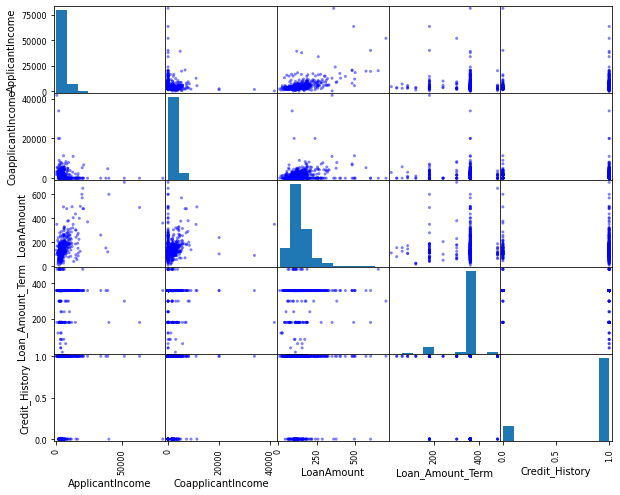

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,8),color='b')
plt.show()

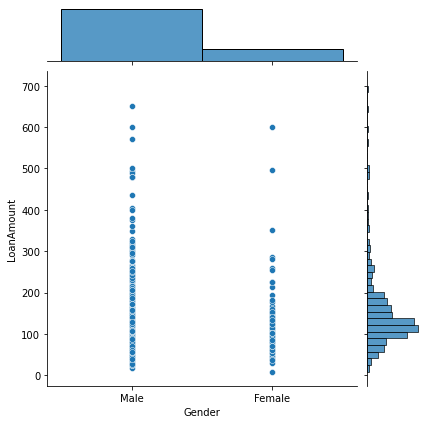

In [21]:
sns.jointplot(x='Gender', y='LoanAmount', data=df)
plt.show()

above showing the jointplot of increasing the loan amount by male population as compared to female population

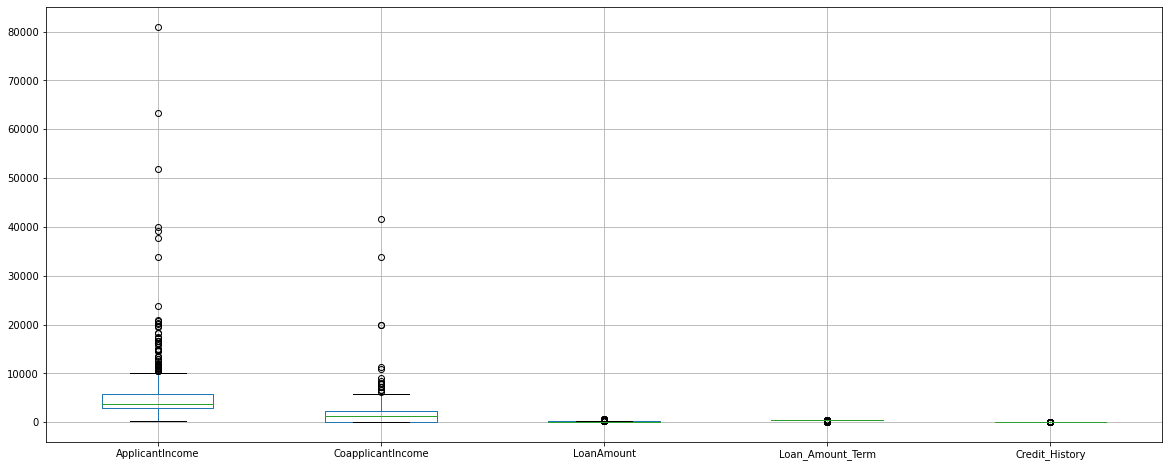

In [22]:
plt.figure(figsize=(20,8))
df.boxplot();

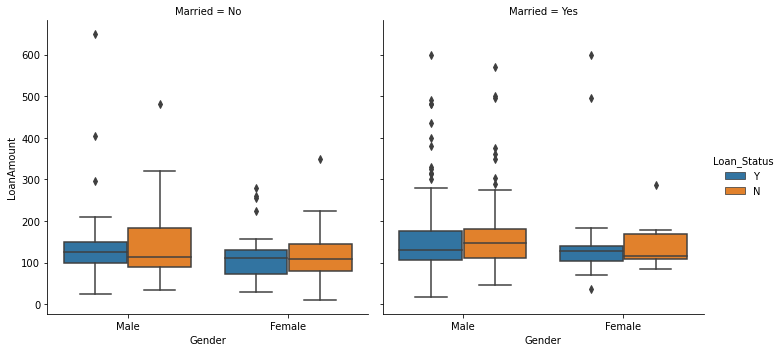

In [23]:
sns.catplot(x='Gender' , y='LoanAmount', data=df,kind='box',hue='Loan_Status',col='Married');

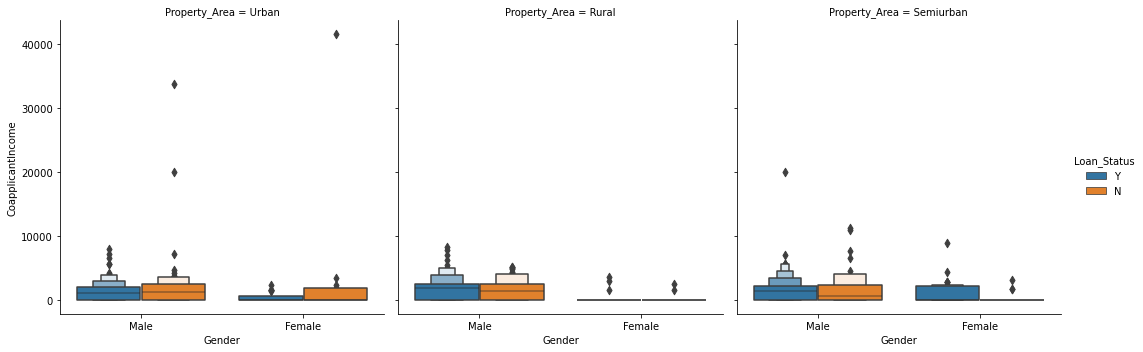

In [24]:
sns.catplot(x='Gender' , y='CoapplicantIncome', data=df,kind='boxen',hue='Loan_Status',col='Property_Area');

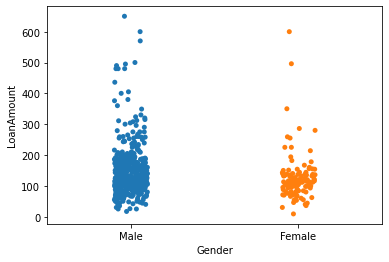

In [25]:
sns.stripplot(x='Gender', y='LoanAmount', data=df);
plt.show()

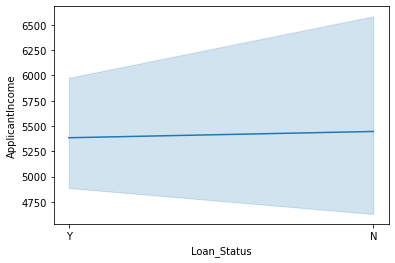

In [26]:
sns.lineplot(x='Loan_Status',y='ApplicantIncome' , data=df);
plt.show()

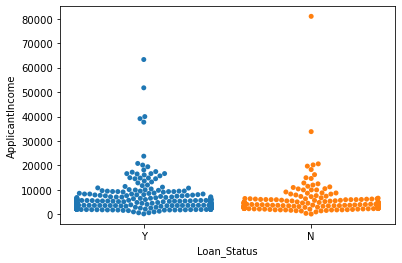

In [27]:
sns.swarmplot(x='Loan_Status',y='ApplicantIncome' , data=df);
plt.show()

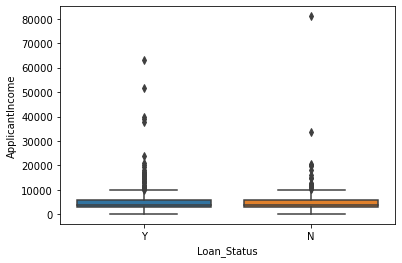

In [28]:
sns.boxplot(x='Loan_Status' , y='ApplicantIncome',data=df);

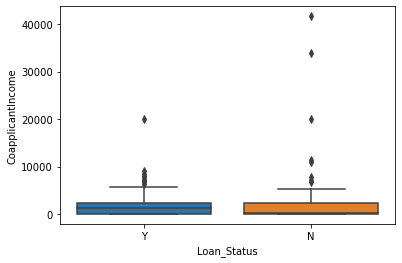

In [29]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome',data=df);

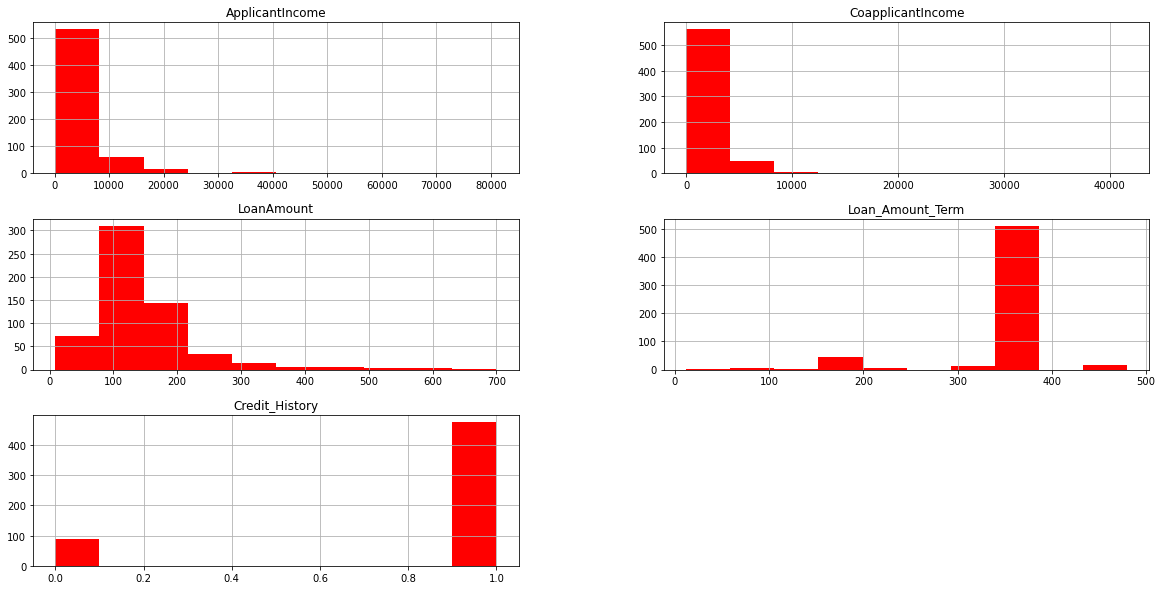

In [30]:
df.hist(color='r',figsize=(20,10))
plt.show()

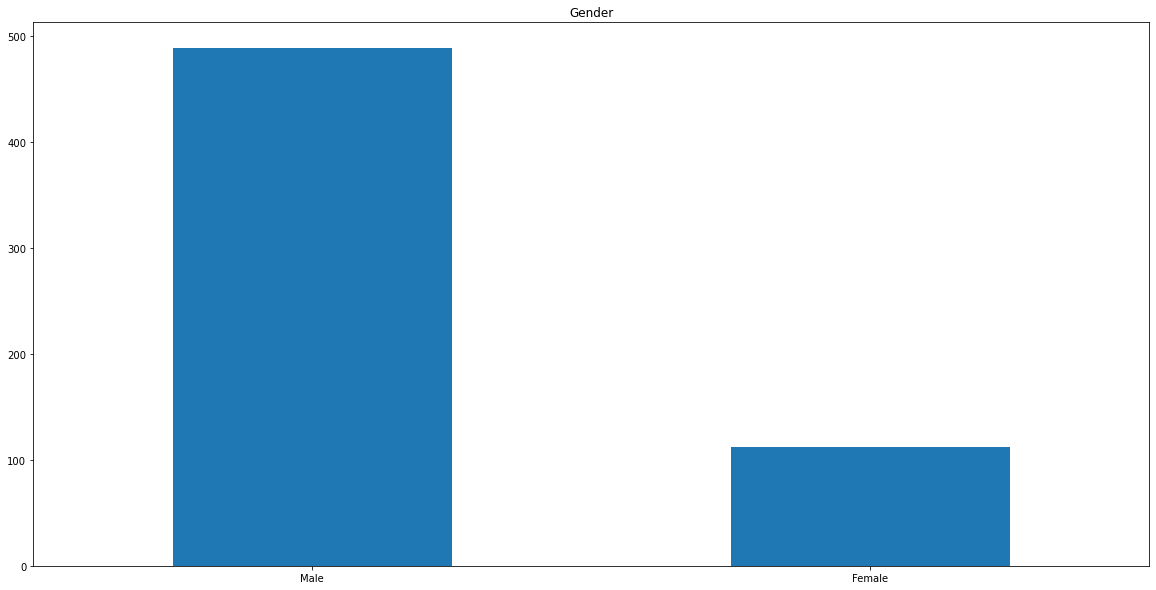

In [31]:
plt.subplot()
df['Gender'].value_counts().plot(kind='bar',title='Gender',figsize=(20,10))
plt.xticks(rotation=0);

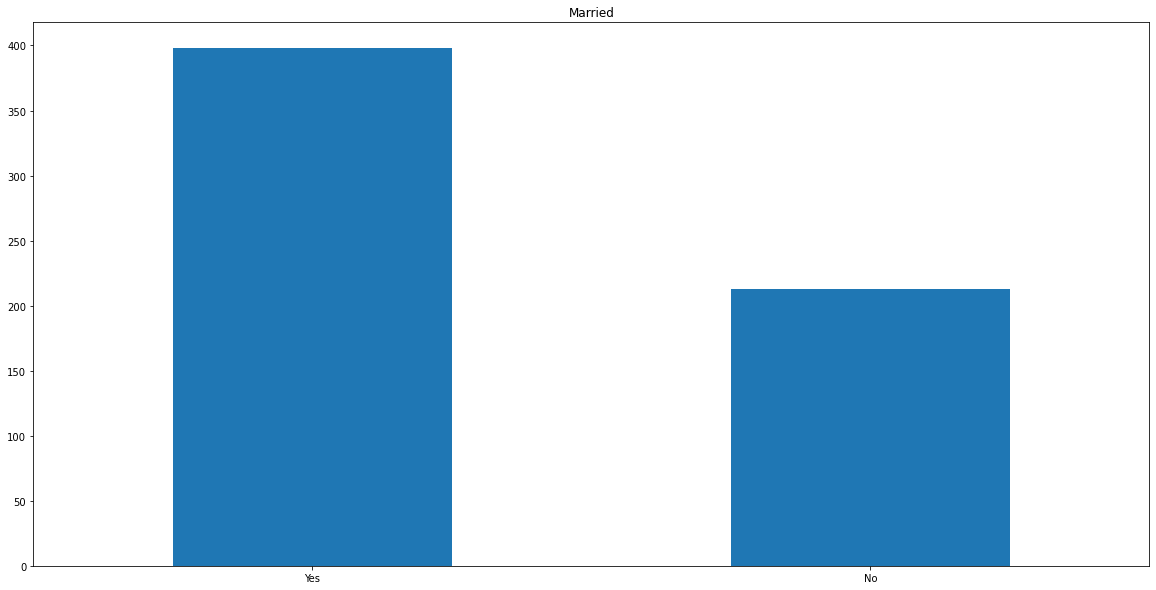

In [32]:
plt.subplot()
df['Married'].value_counts().plot(kind='bar',title='Married',figsize=(20,10))
plt.xticks(rotation=0);

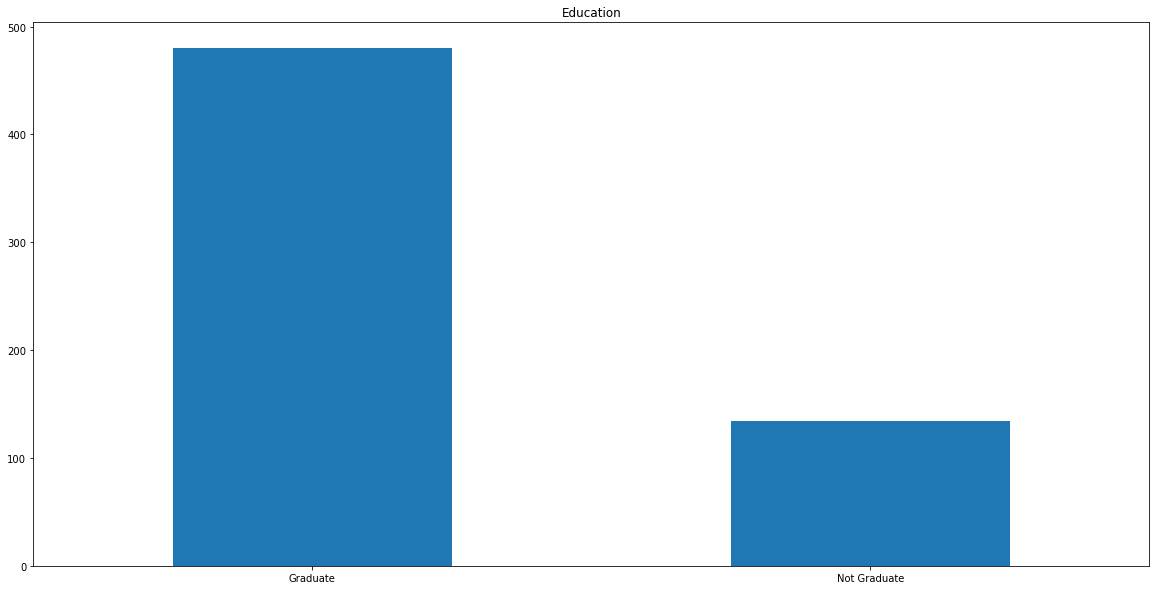

In [33]:
plt.subplot()
df['Education'].value_counts().plot(kind='bar',title='Education',figsize=(20,10))
plt.xticks(rotation=0);

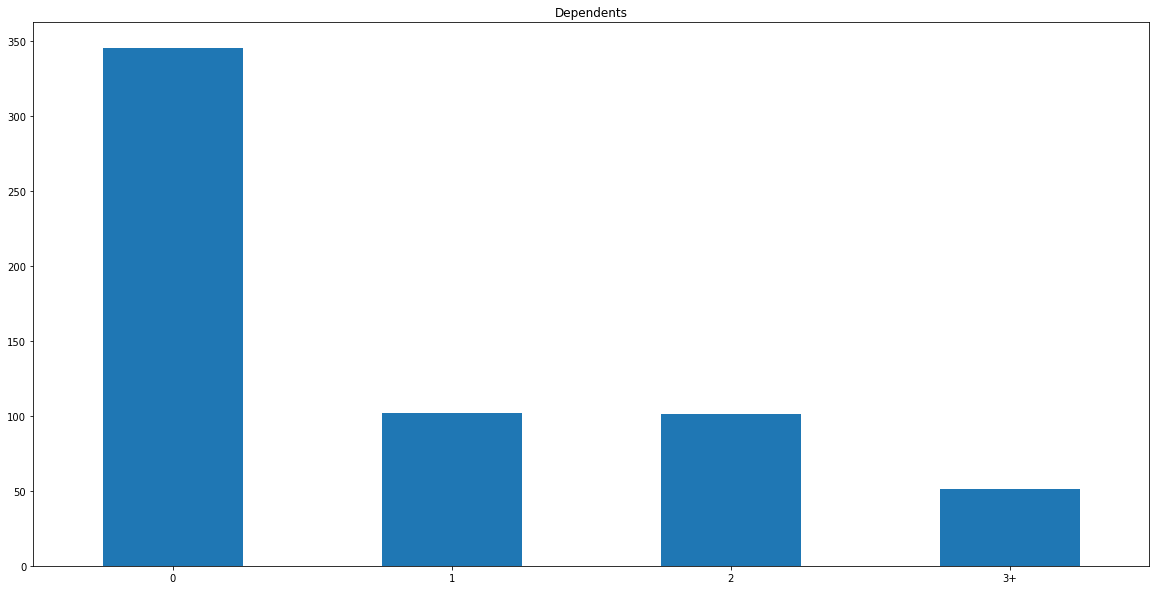

In [34]:
plt.subplot()
df['Dependents'].value_counts().plot(kind='bar',title='Dependents',figsize=(20,10))
plt.xticks(rotation=0);

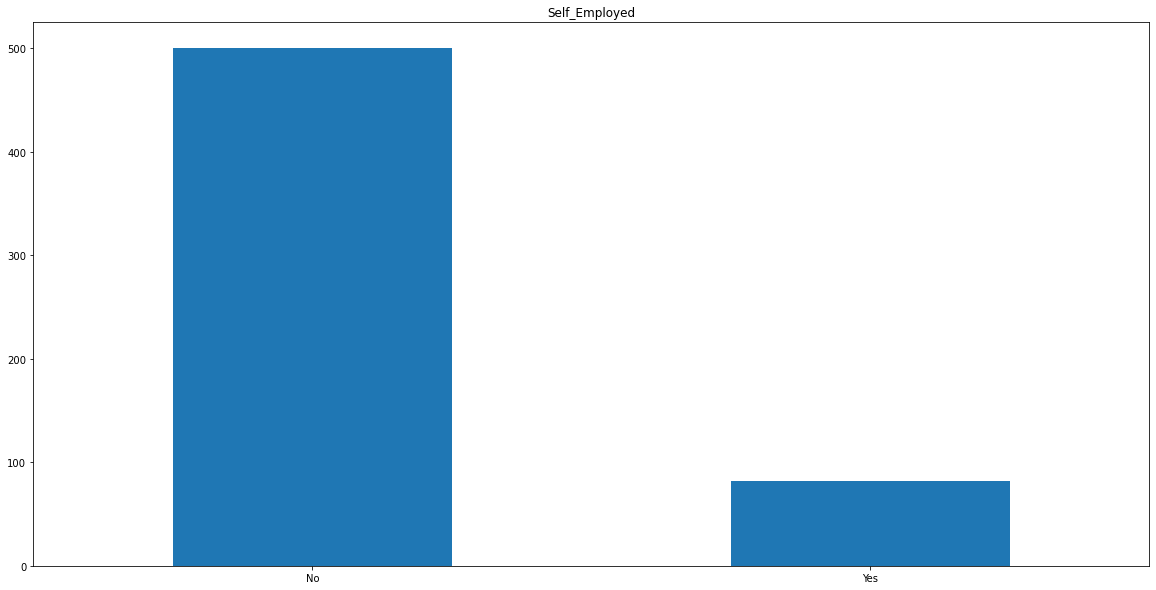

In [35]:
plt.subplot()
df['Self_Employed'].value_counts().plot(kind='bar',title='Self_Employed',figsize=(20,10))
plt.xticks(rotation=0);

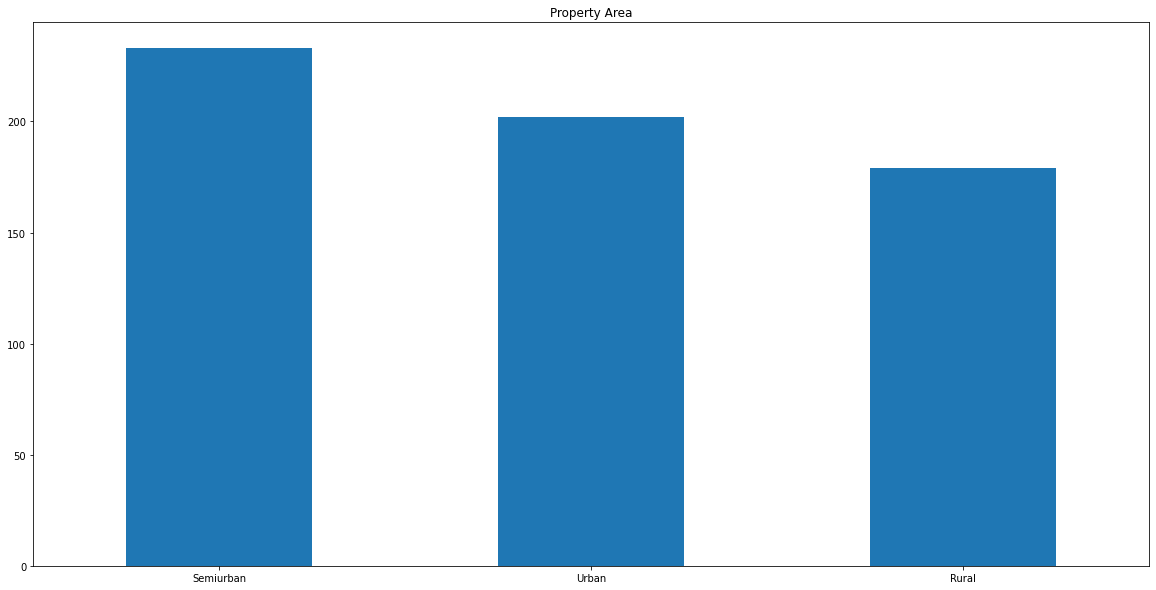

In [36]:
plt.subplot()
df['Property_Area'].value_counts().plot(kind='bar',title='Property Area',figsize=(20,10))
plt.xticks(rotation=0);

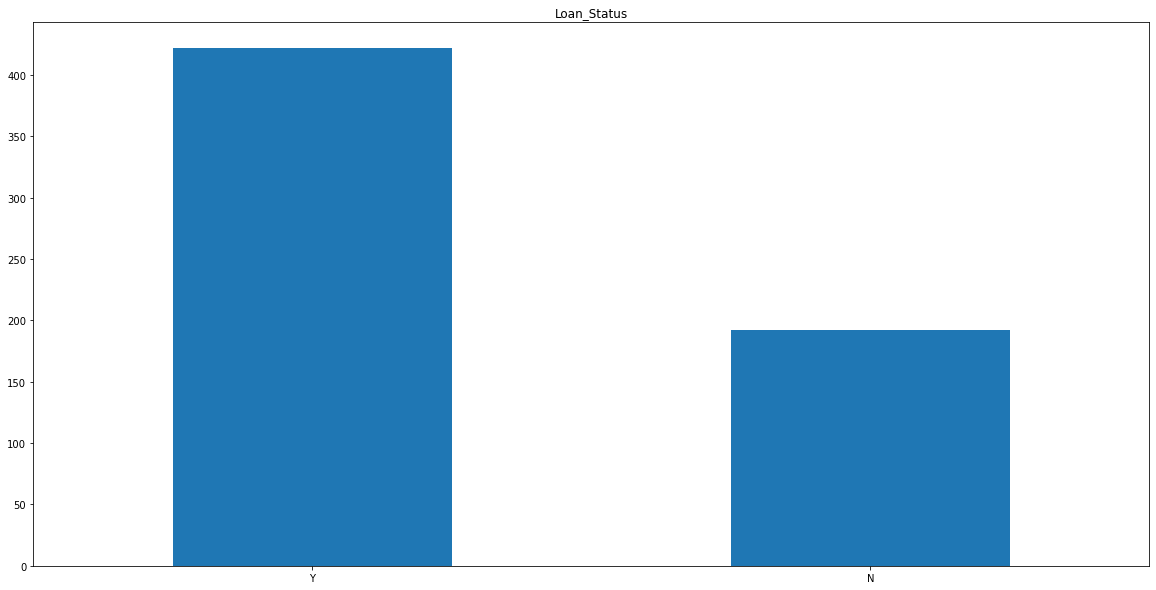

In [37]:
plt.subplot()
df['Loan_Status'].value_counts().plot(kind='bar',title='Loan_Status',figsize=(20,10))
plt.xticks(rotation=0);

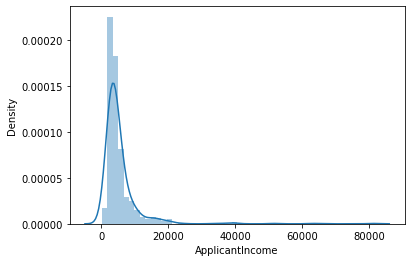

In [38]:
sns.distplot(df['ApplicantIncome']);

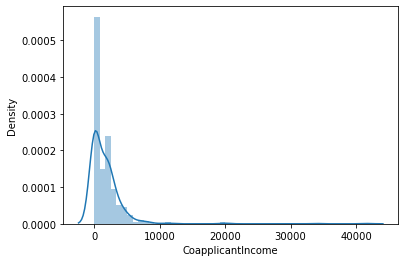

In [39]:
sns.distplot(df['CoapplicantIncome']);

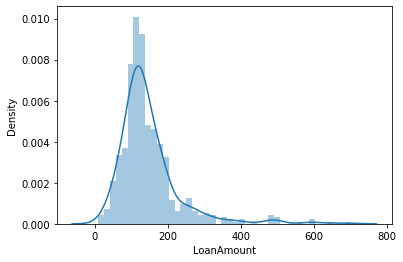

In [40]:
sns.distplot(df['LoanAmount']);

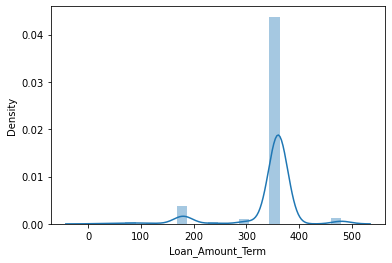

In [41]:
sns.distplot(df['Loan_Amount_Term']);

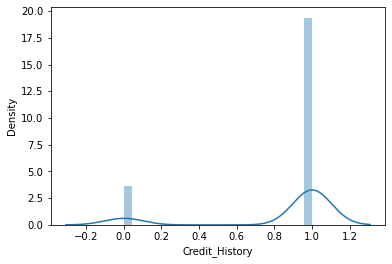

In [42]:
sns.distplot(df['Credit_History']);

<function matplotlib.pyplot.show(close=None, block=None)>

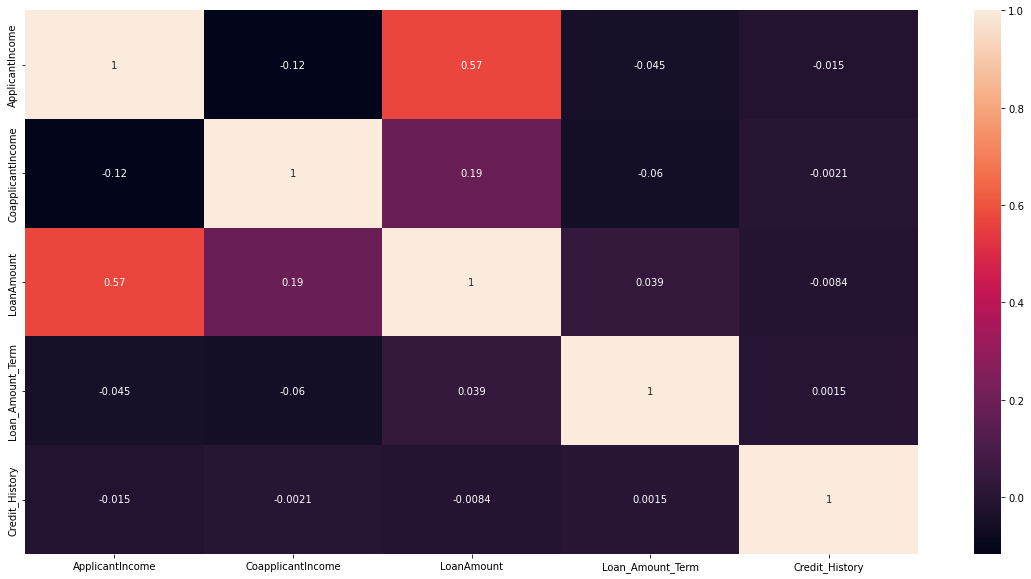

In [43]:
plt.figure(figsize=(20,10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show

                  Loan_Amount_Term  Credit_History
Loan_Amount_Term           1.00000         0.00147
Credit_History             0.00147         1.00000


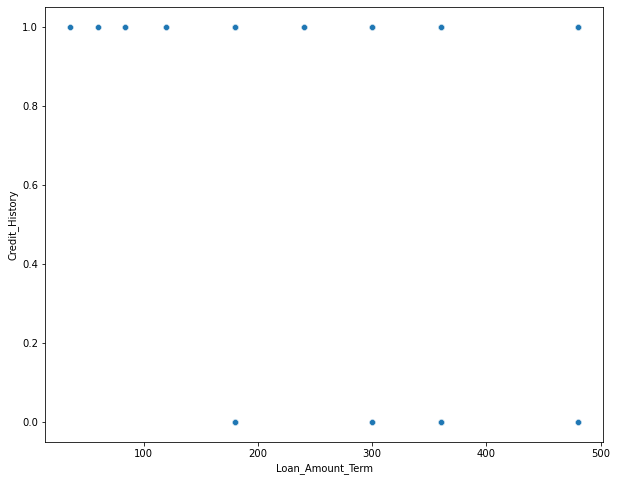

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Loan_Amount_Term'],df['Credit_History'])
print(df[['Loan_Amount_Term' , 'Credit_History']].corr())
plt.show()

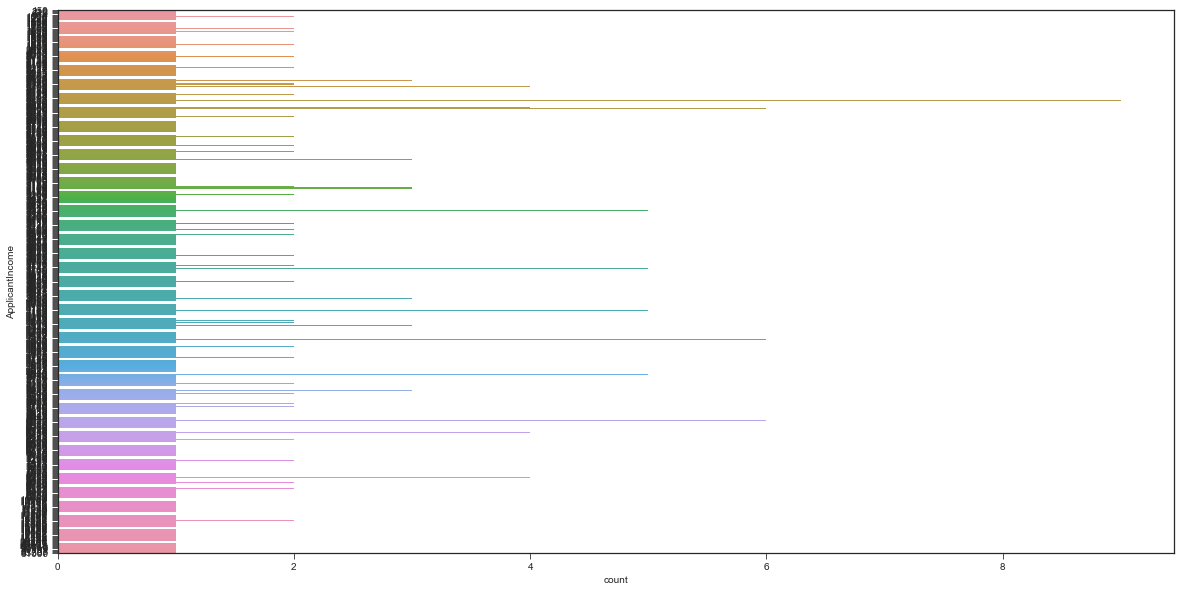

In [45]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10))
sns.countplot(y="ApplicantIncome",data=df);

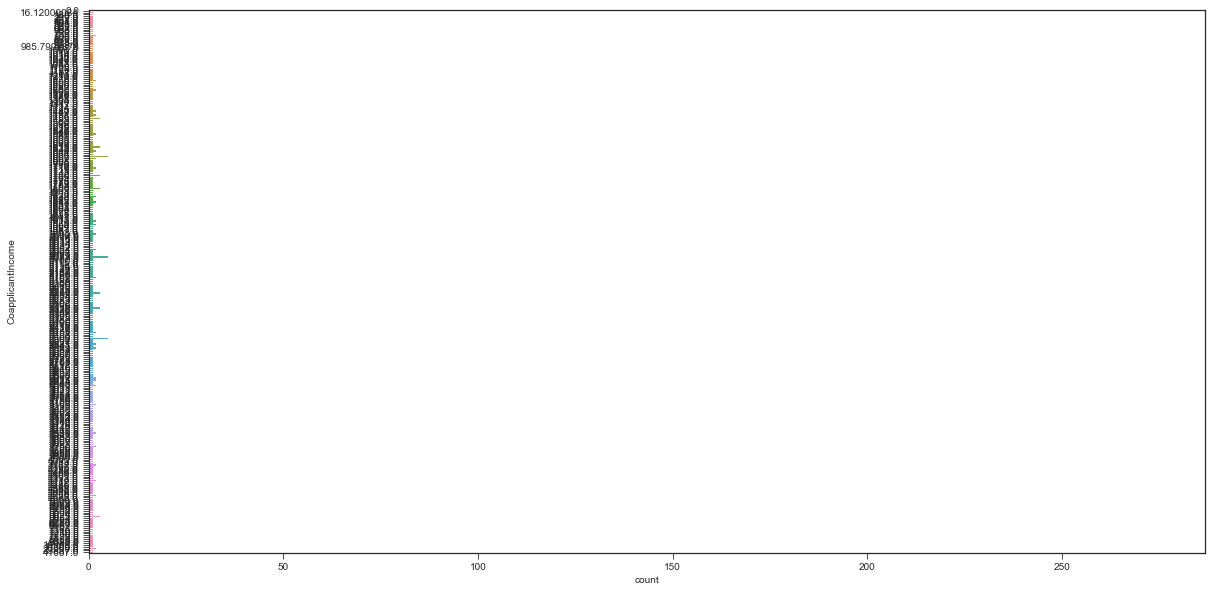

In [46]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10))
sns.countplot(y="CoapplicantIncome",data=df);

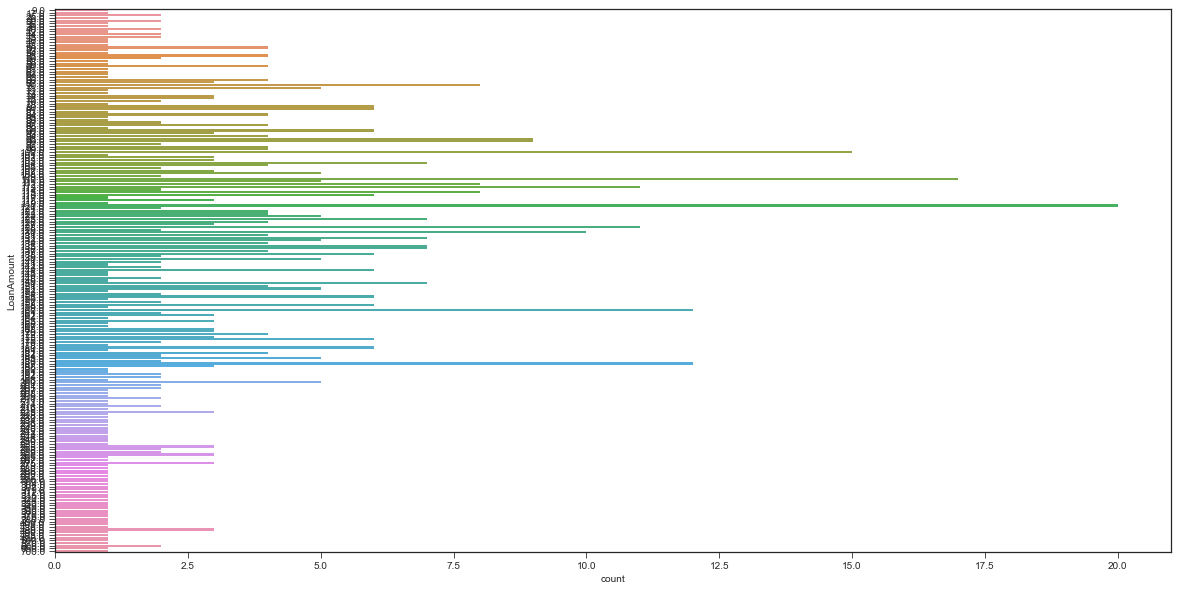

In [47]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10))
sns.countplot(y="LoanAmount",data=df);

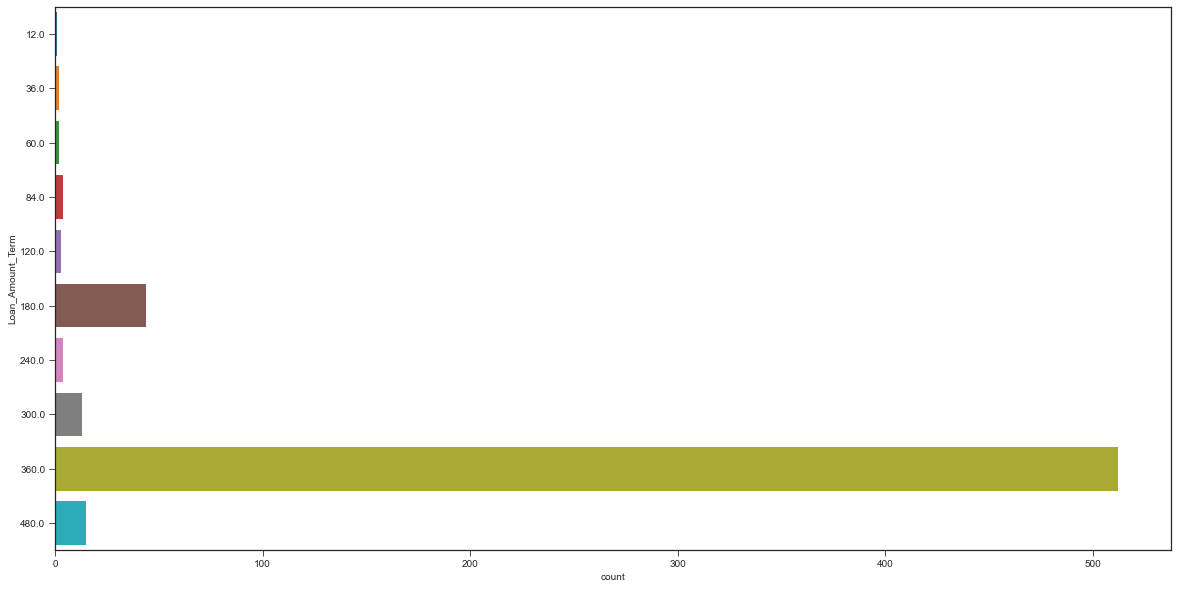

In [48]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10))
sns.countplot(y="Loan_Amount_Term",data=df);

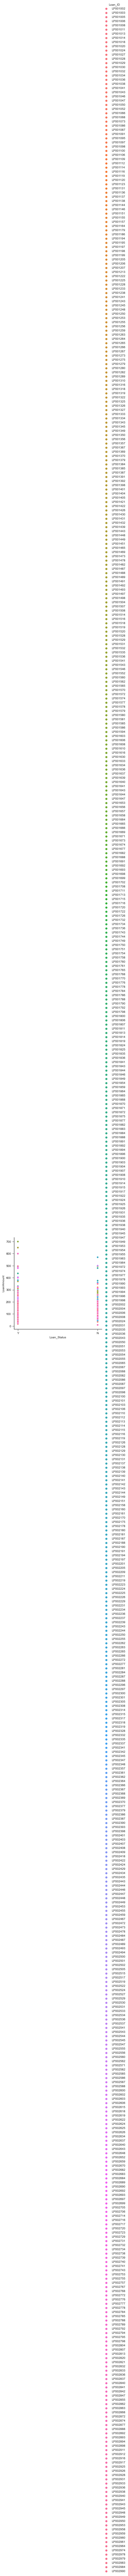

In [49]:
sns.relplot(x='Loan_Status' , y='LoanAmount' , hue='Loan_ID' , data=df);

<AxesSubplot:>

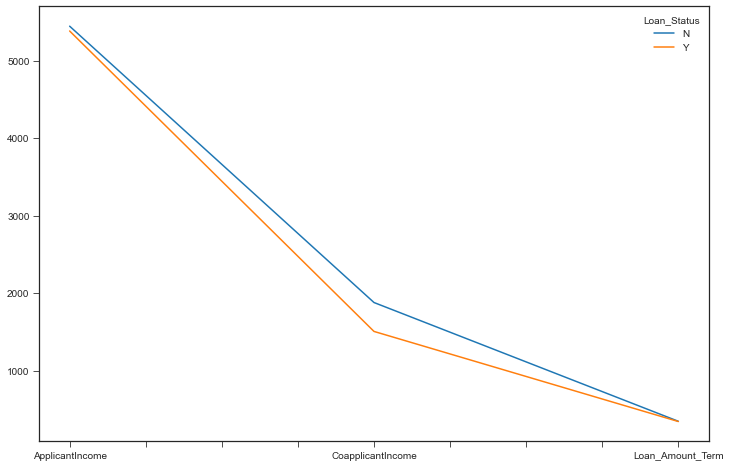

In [50]:
df.groupby('Loan_Status')[['ApplicantIncome' , 'CoapplicantIncome' , 'Loan_Amount_Term']].mean().T.plot(figsize=(12,8))

<AxesSubplot:>

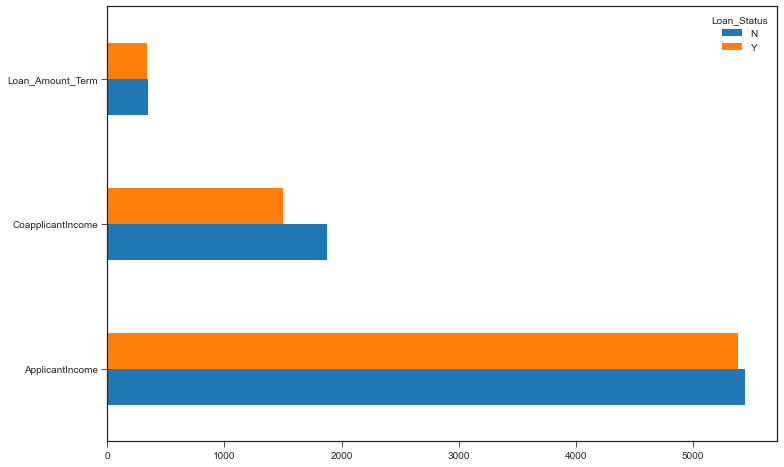

In [51]:
df.groupby('Loan_Status')[['ApplicantIncome' , 'CoapplicantIncome' , 'Loan_Amount_Term']].mean().T.plot(kind='barh' , figsize=(12,8))

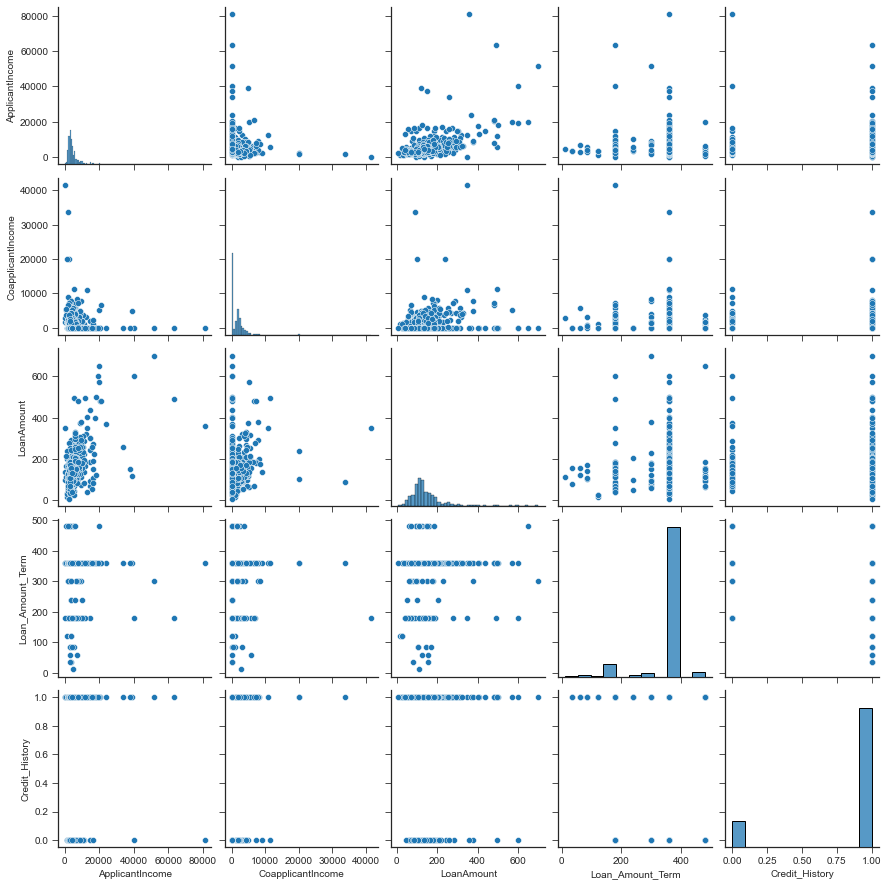

In [52]:
sns.pairplot(df)

BUILDING MODEL

In [53]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
# importing all mlpackages
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

In [56]:
df=df.dropna()
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
X_train=df['LoanAmount']
X_test=df['Loan_Amount_Term']
y=df.Loan_Status

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X_train,y,test_size=0.3,random_state=42)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred = gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print("\n====================Train Result=====================")

print("Accuracy Score: ",accuracy_score(y_train,pred)*100 )

print("__________________________________________________")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("___________________________________________________")
print(f"Cofusion Matrix:  \n {confusion_matrix(y_train, pred)}\n")

#****************************Test score********************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("\n==================Test Result==========================")
print("Accuracy: ", accuracy_score(y_test,pred) * 100)
print("_____________________________________________")
print(f"CLASSIFICATION REPORT :\n{clf_report}")
print("______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



====================Train Result=====================
Accuracy Score:  75.59523809523809
__________________________________________________
CLASSIFICATION REPORT : 
                    N           Y  accuracy   macro avg  weighted avg
precision    0.923077    0.741935  0.755952    0.832506      0.798003
recall       0.230769    0.991379  0.755952    0.611074      0.755952
f1-score     0.369231    0.848708  0.755952    0.608970      0.700299
support    104.000000  232.000000  0.755952  336.000000    336.000000
___________________________________________________
Cofusion Matrix:  
 [[ 24  80]
 [  2 230]]


==================Test Result==========================
Accuracy:  70.13888888888889
_____________________________________________
CLASSIFICATION REPORT :
                   N           Y  accuracy   macro avg  weighted avg
precision   0.533333    0.720930  0.701389    0.627132      0.663609
recall      0.181818    0.930000  0.701389    0.555909      0.701389
f1-score    0.271186    0

In [60]:
from sklearn.model_selection import GridSearchCV
grid_param={'max_depth' : range(4,8),'min_samples_split' : range(2,8,2),'learning_rate' : np.arange(0.1,0.3)}

In [61]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [62]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2}

In [63]:
gbdt_clf = GradientBoostingClassifier(
        max_depth=4, min_samples_split=4, learning_rate=0.1)

gbdt_clf.fit(X_train,y_train)

pred = gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print("\n===================Train Result=====================")

print("Accuracy Score: " ,accuracy_score(y_train, pred)*100)

print("__________________________________________________")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("___________________________________________________")
print(f"CLASSIFICATION REPORT : \n{clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n")

#****************************Test score*************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n===================TestResult======================")
print("Accuracy Score:", accuracy_score(y_test,pred) * 100)
print("_________________________________________________")
print(f"CLASSIFICATION REPORT : \n{clf_report}")
print("__________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


===================Train Result=====================
Accuracy Score:  79.76190476190477
__________________________________________________
CLASSIFICATION REPORT : 
                    N           Y  accuracy   macro avg  weighted avg
precision    0.833333    0.790780  0.797619    0.812057      0.803951
recall       0.432692    0.961207  0.797619    0.696950      0.797619
f1-score     0.569620    0.867704  0.797619    0.718662      0.775440
support    104.000000  232.000000  0.797619  336.000000    336.000000
___________________________________________________
CLASSIFICATION REPORT : 
                   N           Y  accuracy   macro avg  weighted avg
precision   0.533333    0.720930  0.701389    0.627132      0.663609
recall      0.181818    0.930000  0.701389    0.555909      0.701389
f1-score    0.271186    0.812227  0.701389    0.541707      0.646909
support    44.000000  100.000000  0.701389  144.000000    144.000000
____________________________________________________
Confusion 

In [64]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
X = df['Loan_Amount_Term']
y = df['LoanAmount']

In [65]:
y

1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 480, dtype: float64

In [66]:
reg=LinearRegression()
reg=reg.fit(X.values.reshape(-1,1),y)
predictions=reg.predict(X.values.reshape(-1,1))

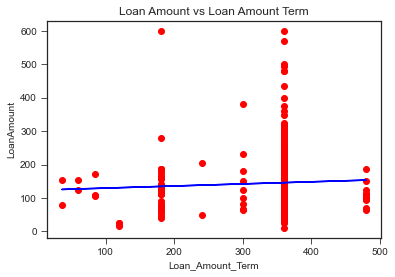

In [67]:
plot.scatter(X,y,color='red')
plot.plot(X,predictions,color='blue')
plot.title('Loan Amount vs Loan Amount Term')
plot.xlabel('Loan_Amount_Term')
plot.ylabel('LoanAmount')
plot.show()

In [68]:
from sklearn.metrics import r2_score
r2_score(y,predictions)

0.0025874265313400313

In [69]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred=randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test, y_test)
print('The accuracy of the Random Forest Model is ', score_randomforest)

The accuracy of the Random Forest Model is  0.6388888888888888


In [70]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred=knn.predict(X_test)
score_knn=knn.score(X_test,y_test)
print('The accuracy of the KNN Model is' , score_knn)

The accuracy of the KNN Model is 0.6180555555555556


In [71]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the LogisticRegression is', score_logreg)

The accuracy of the LogisticRegression is 0.6944444444444444


In [72]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_svc=svc.score(X_test, y_test)
print('The accuarcy of SVC is', score_svc)

The accuarcy of SVC is 0.6458333333333334


the most accurate model is Logistic Regression

# CONCLUSION

I first use exploratory data analysis to show an approach of analyzing data sets, then use the train a machine learning model and use the trained model of prediction. Any model can be made much more precise and accurate fro predictions, by very large dataset,to get a accurate and realistic score.The most accurate model is Logistic Regression.

my accuracy score was 79.7%.

# 

# THANK YOU